# CV TA 2
## Name : Tanmay Dhobale
## Roll no : A4_63

### Problem Statement


### 1. Implement the SIFT algorithm to detect and match key points between two images.


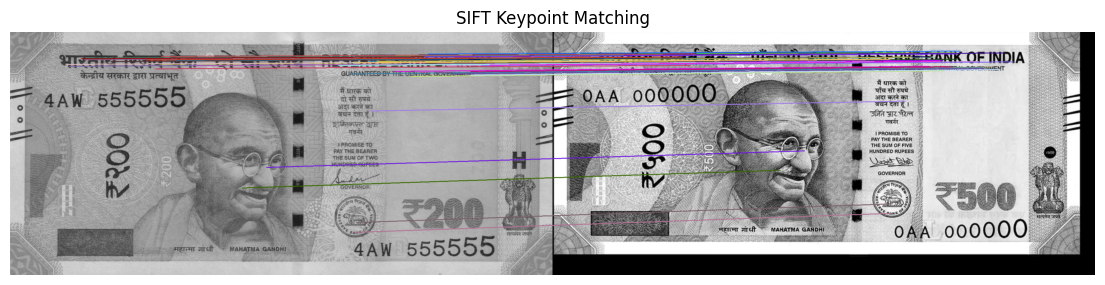

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Image paths
image1_path = "/content/200.jpg"
image2_path = "/content/500.jpg"

# Load images
img1 = cv2.imread(cv2.samples.findFile(image1_path), cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(cv2.samples.findFile(image2_path), cv2.IMREAD_GRAYSCALE)

# Resize img2 to match img1's dimensions
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Convert grayscale images to color for better visualization
img1_color = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
img2_color = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect and compute key points and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use FLANN-based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match descriptors
matches = flann.knnMatch(des1, des2, k=2)

# Apply ratio test with stricter threshold
good_matches = []
for m, n in matches:
    if m.distance < 0.5 * n.distance:  # More refined ratio test
        good_matches.append(m)

# Limit matches to top 50 for better visualization
good_matches = sorted(good_matches, key=lambda x: x.distance)[:50]

# Draw matches with randomized colors for better visibility
output_img = cv2.hconcat([img1_color, img2_color])
for match in good_matches:
    pt1 = tuple(map(int, kp1[match.queryIdx].pt))
    pt2 = tuple(map(int, (kp2[match.trainIdx].pt[0] + img1.shape[1], kp2[match.trainIdx].pt[1])))
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    cv2.line(output_img, pt1, pt2, color, 2)

# Display result
plt.figure(figsize=(14, 7))
plt.imshow(output_img)
plt.title("SIFT Keypoint Matching")
plt.axis("off")
plt.show()


### 2. Use RANSAC to remove outlier key point matches and fit a transformation model between two images.


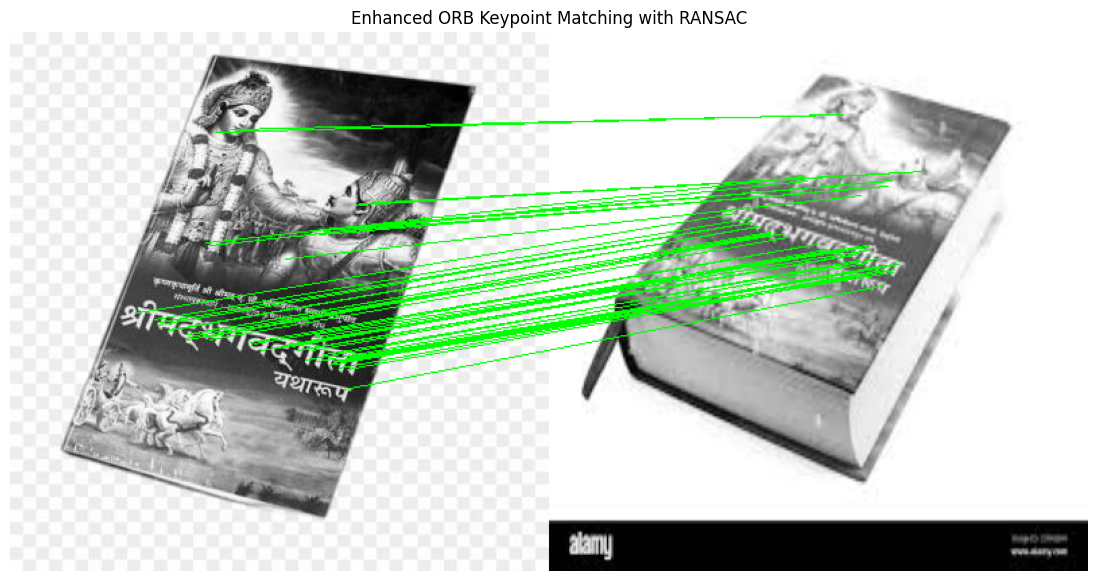

In [ ]:
# Image paths
image1_path = "/content/bhagavad.png"
image2_path = "/content/gita_1.jpg"

# Load images
img1 = cv2.imread(cv2.samples.findFile(image1_path), cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(cv2.samples.findFile(image2_path), cv2.IMREAD_GRAYSCALE)

# Resize img2 to match img1's dimensions
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Convert grayscale images to color for better visualization
img1_color = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
img2_color = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect and compute key points and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Use BFMatcher with Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

# Match descriptors
matches = bf.match(des1, des2)

# Convert keypoints to numpy arrays
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Apply RANSAC to remove outliers
H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)
mask = mask.ravel().tolist()

# Filter inlier matches
inlier_matches = [matches[i] for i in range(len(matches)) if mask[i]]

# Sort matches by distance and take the top 50 inliers
inlier_matches = sorted(inlier_matches, key=lambda x: x.distance)[:50]

# Draw inlier matches with distinct colors
output_img = cv2.hconcat([img1_color, img2_color])
for match in inlier_matches:
    pt1 = tuple(map(int, kp1[match.queryIdx].pt))
    pt2 = tuple(map(int, (kp2[match.trainIdx].pt[0] + img1.shape[1], kp2[match.trainIdx].pt[1])))
    color = (0, 255, 0)  # Bright green for visibility
    cv2.line(output_img, pt1, pt2, color, 1)  # Reduced line thickness to 1

# Display result
plt.figure(figsize=(14, 7))
plt.imshow(output_img)
plt.title("Enhanced ORB Keypoint Matching with RANSAC")
plt.axis("off")
plt.show()


### 3. Implement the Harris corner detector to find and visualize corners in a grayscale image.


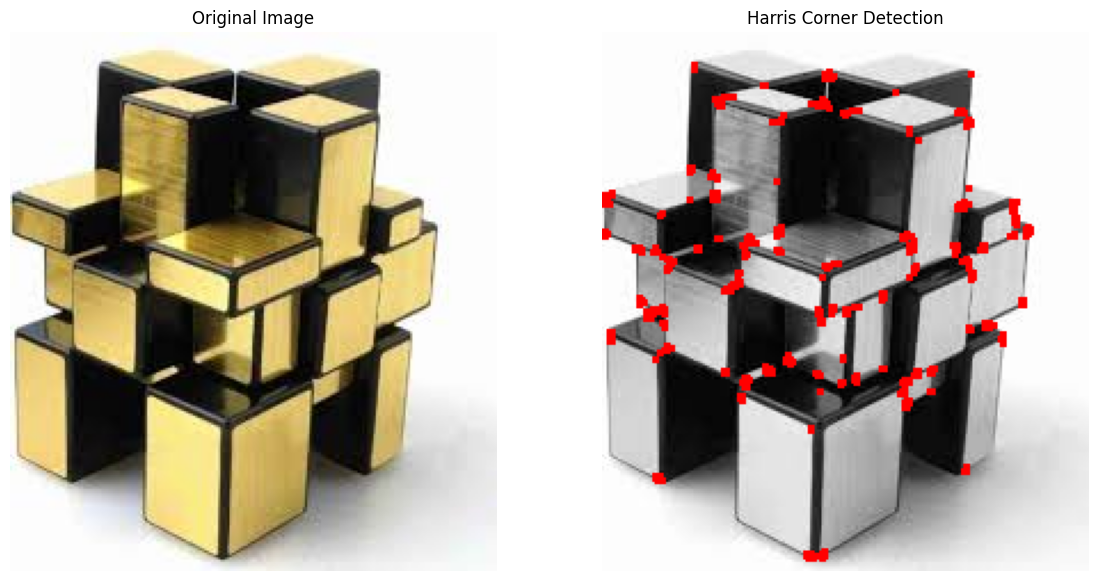

In [ ]:
# Image path
image_path = "/content/cube.jpg"

# Load image in grayscale
img = cv2.imread(cv2.samples.findFile("/content/cube.jpg"), cv2.IMREAD_GRAYSCALE)

# Convert grayscale image to color for visualization
img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Apply Harris Corner Detection
corner_strength = cv2.cornerHarris(img, blockSize=2, ksize=3, k=0.04)
corner_strength = cv2.dilate(corner_strength, None)  # Enhance corner points

# Mark detected corners in red
img_color[corner_strength > 0.01 * corner_strength.max()] = [0, 0, 255]

# Display original and result side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Original Image
axes[0].imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

# Harris Corner Detection Output
axes[1].imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
axes[1].set_title("Harris Corner Detection")
axes[1].axis("off")

plt.show()


### 4. Use the Shi-Tomasi corner detector to identify and mark corner points in an image.


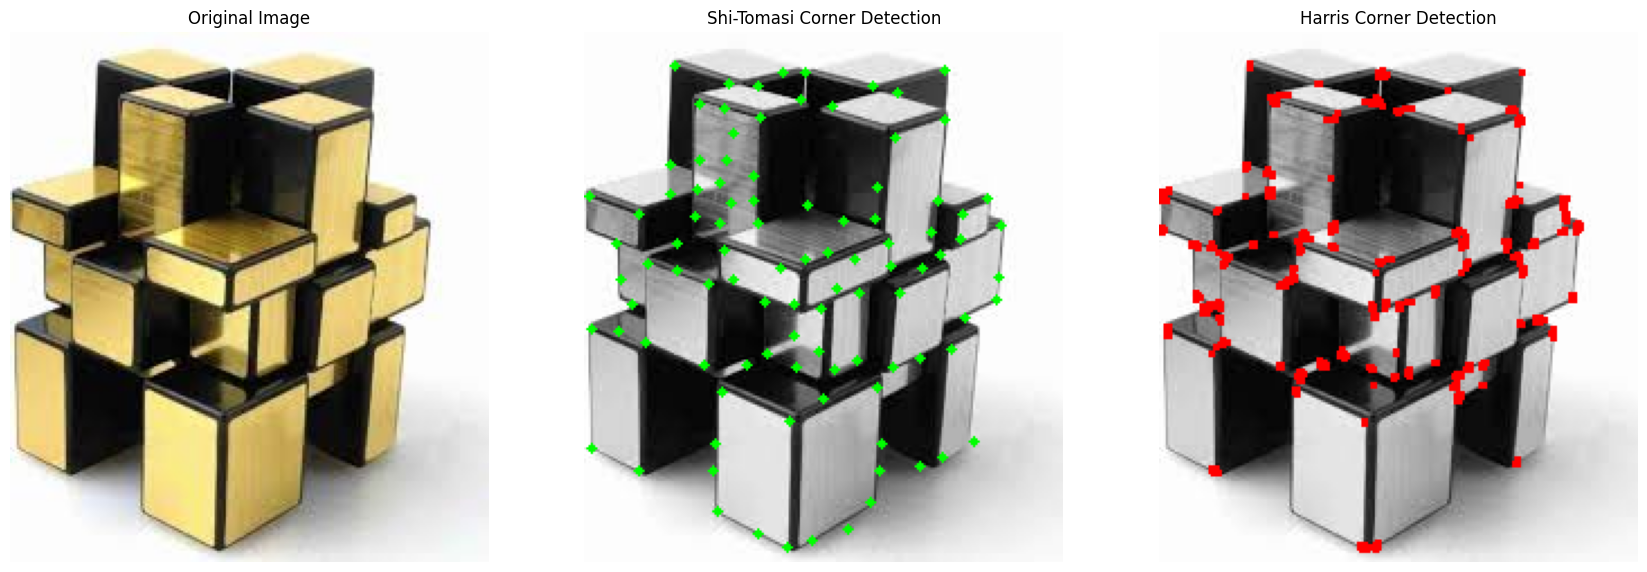

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image path
image_path = "/content/cube.jpg"

# Load image in grayscale
img = cv2.imread(cv2.samples.findFile("/content/cube.jpg"), cv2.IMREAD_GRAYSCALE)

# Convert grayscale image to color for visualization
img_color_shi = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img_color_harris = img_color_shi.copy()

# Apply Shi-Tomasi Corner Detection
corners_shi = cv2.goodFeaturesToTrack(img, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners_shi = np.intp(corners_shi)  # Corrected for compatibility

# Mark detected Shi-Tomasi corners in green
for corner in corners_shi:
    x, y = corner.ravel()
    cv2.circle(img_color_shi, (x, y), 2, (0, 255, 0), -1)

# Apply Harris Corner Detection
harris_corners = cv2.cornerHarris(img, blockSize=2, ksize=3, k=0.04)
harris_corners = cv2.dilate(harris_corners, None)
img_color_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]  # Mark Harris corners in red

# Load original image for side-by-side comparison
original_img = cv2.imread(cv2.samples.findFile(image_path))

# Display original, Shi-Tomasi, and Harris results side by side
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

# Original Image
axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

# Shi-Tomasi Corner Detection Output
axes[1].imshow(cv2.cvtColor(img_color_shi, cv2.COLOR_BGR2RGB))
axes[1].set_title("Shi-Tomasi Corner Detection")
axes[1].axis("off")

# Harris Corner Detection Output
axes[2].imshow(cv2.cvtColor(img_color_harris, cv2.COLOR_BGR2RGB))
axes[2].set_title("Harris Corner Detection")
axes[2].axis("off")

plt.show()